In [36]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression


In [37]:
pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/vgsalesGlobale.csv')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [38]:
pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/JJOO.csv')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,Muhammad Abbas,M,23.0,168.0,55.0,Pakistan,PAK,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
1,2,Jeremy Abbott,M,24.0,175.0,70.0,United States,USA,2010 Winter,2010,Winter,Vancouver,Figure Skating,Figure Skating Men's Singles,NaN
2,3,Enver Nazymovych Ablaiev,M,30.0,169.0,68.0,Ukraine,UKR,2010 Winter,2010,Winter,Vancouver,Freestyle Skiing,Freestyle Skiing Men's Aerials,NaN
3,4,Iason Abramashvili,M,21.0,176.0,82.0,Georgia,GEO,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
4,5,Iason Abramashvili,M,21.0,176.0,82.0,Georgia,GEO,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,35897,Marc Zwiebler,M,32.0,181.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,NaN
35897,35898,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
35898,35899,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN
35899,35900,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN


In [39]:
pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/application_record.csv')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


In [40]:
df_ventasglobales=pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/vgsalesGlobale.csv')
df_medallas=pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/JJOO.csv')
df_credit=pd.read_csv('/workspaces/DataSets_CruzKimFranco/Data/Raw/application_record.csv')

In [ ]:
#para mostrar los 5 primeros registros es: df_#nombre.head(5)
#para mostrar los 5 últimos registros es: df_#nombre.tail(5)
#para mostrar 5 registros aleatorios es: df_#nombre.sample(5)
#para ver el tamaño de la base se usa .shape (Filas.Columnas)
#para depuraruna base, se puede usar ".drop" seguido de lo que se quiere eliminar, esto eliminaría toda la fila
#cuando son registros que incluyen NA pero se desea mantener el resto de la información se puede utilizar el comando
#".fillna(0)" y lo sustituye por cero

## Descripción de mis Variables

In [8]:
#las variables que utilizare en el data set de vgsalesGlobales, serán:
#Genre: Genero
#Platform: Plataforma
#Global_Sales
#Publisher: estudio que lo desarrolló

#estas variables me ayudarán a ver que publicante tiene mayor ventas, en que plataforma y que generó tienen más éxito en ventas

In [41]:
df_ventasglobales [['Genre','Platform','Global_Sales','Publisher']]

,Genre,Platform,Global_Sales,Publisher
0,Sports,Wii,82.74,Nintendo
1,Platform,NES,40.24,Nintendo
2,Racing,Wii,35.82,Nintendo
3,Sports,Wii,33.00,Nintendo
4,Role-Playing,GB,31.37,Nintendo
...,...,...,...,...
16593,Platform,GBA,0.01,Kemco
16594,Shooter,GC,0.01,Infogrames
16595,Racing,PS2,0.01,Activision
16596,Puzzle,DS,0.01,7G//AMES


In [ ]:
#en mi data set queremos predecir por las varialbes de edad, peso, categoria y país, que medalla ganaría oro, plata o bronze 

In [42]:
df_medallas[['NOC','Age','Weight','Sport']]

,NOC,Age,Weight,Sport
0,PAK,23.0,55.0,Alpine Skiing
1,USA,24.0,70.0,Figure Skating
2,UKR,30.0,68.0,Freestyle Skiing
3,GEO,21.0,82.0,Alpine Skiing
4,GEO,21.0,82.0,Alpine Skiing
...,...,...,...,...
35896,GER,32.0,75.0,Badminton
35897,KAZ,23.0,62.0,Athletics
35898,KAZ,23.0,62.0,Athletics
35899,KAZ,23.0,62.0,Athletics


In [14]:
#en el data set de aplicaciones a tarjetas de crédito, quiero ver que usuarios y variables
#son las que generan mayor ingreso por medio de AMT Income

In [43]:
df_credit[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
0,M,Y,Y,0,427500.0,Working,Higher education
1,M,Y,Y,0,427500.0,Working,Higher education
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special
...,...,...,...,...,...,...,...
438552,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special
438553,F,N,N,0,103500.0,Working,Secondary / secondary special
438554,F,N,N,0,54000.0,Commercial associate,Higher education
438555,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special


# Segunda Entrega

### Usando Mitlab

In [44]:
df_ventasglobales.index = df_ventasglobales['Year']


In [45]:
x=df_ventasglobales.index
y=df_ventasglobales ['Global_Sales']
y

Year
2006.0    82.74
1985.0    40.24
2008.0    35.82
2009.0    33.00
1996.0    31.37
          ...  
2002.0     0.01
2003.0     0.01
2008.0     0.01
2010.0     0.01
2003.0     0.01
Name: Global_Sales, Length: 16598, dtype: float64

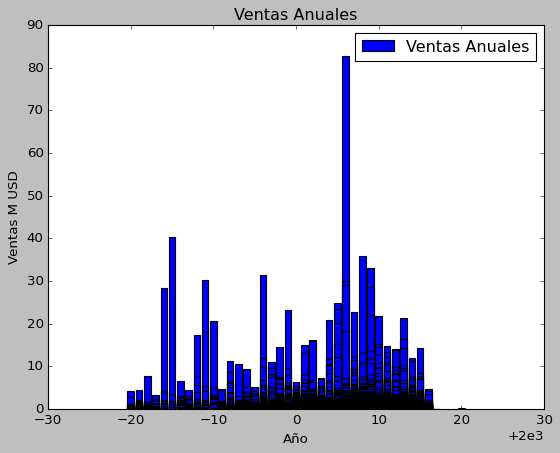

In [46]:
fig,ax=plt.subplots()
ax.bar(x,y,label='Ventas Anuales')
ax.set_xlabel('Año')
ax.set_ylabel('Ventas M USD')
ax.set_title('Ventas Anuales')
ax.legend()

#en esta gráfica se puede observar que ne 2006 se tuvo un auge en las ventas de videojuegos, es interesante observar más a detalle que es lo que impulsó 
#esta venta, puede ser por un título en especial, ya que no influye la venta de consolas, no puede afectar el análisis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


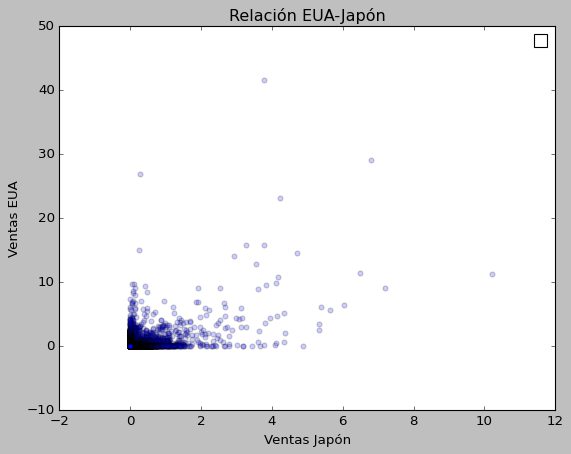

In [47]:
x=df_ventasglobales[['JP_Sales']]
y=df_ventasglobales[['NA_Sales']]

fig,ax=plt.subplots()
ax.scatter(x,y,alpha=0.2)
ax.set_xlabel('Ventas Japón')
ax.set_ylabel('Ventas EUA')
ax.set_title('Relación EUA-Japón')
ax.legend()

#en esta gráfica se puede observar que no hay una correlacion entre las ventas de eua y las de japón. se puede decir que las ventas de japón son atipicas a las del
#mercado global, ya que EUA es el mayor mercado y consumidor de este rubro, japón no se ve influenciado

Text(0.5, 1.0, 'Histograma de Genero')

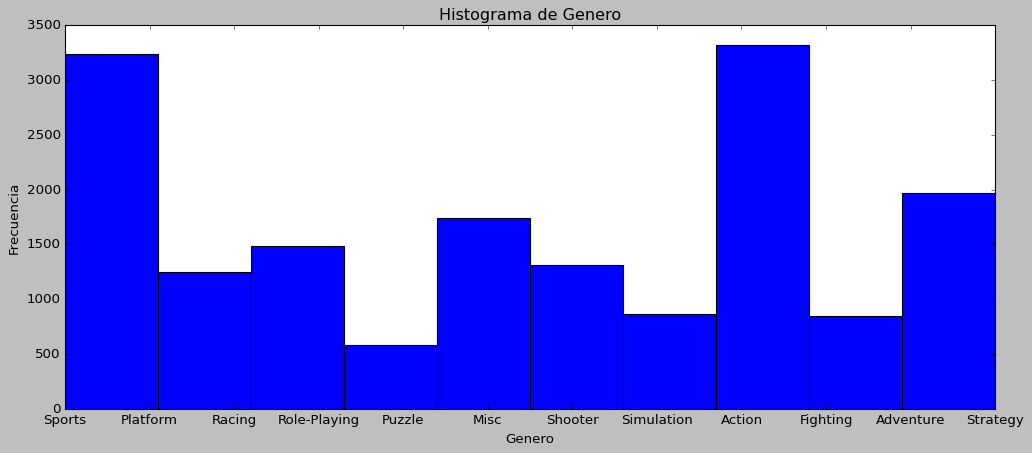

In [48]:
x=df_ventasglobales[['Genre']]
mpl.style.use('classic')
fig,ax=plt.subplots(figsize=(15,6))
ax.hist(x,bins=None,density=False,orientation='vertical')
ax.set_xlabel('Genero')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Genero')
#en el histograma, podemos observar que las ventas globales están fuertemente relacionadas con los juegos de Acción y deportes. 


### Usando Seaborn

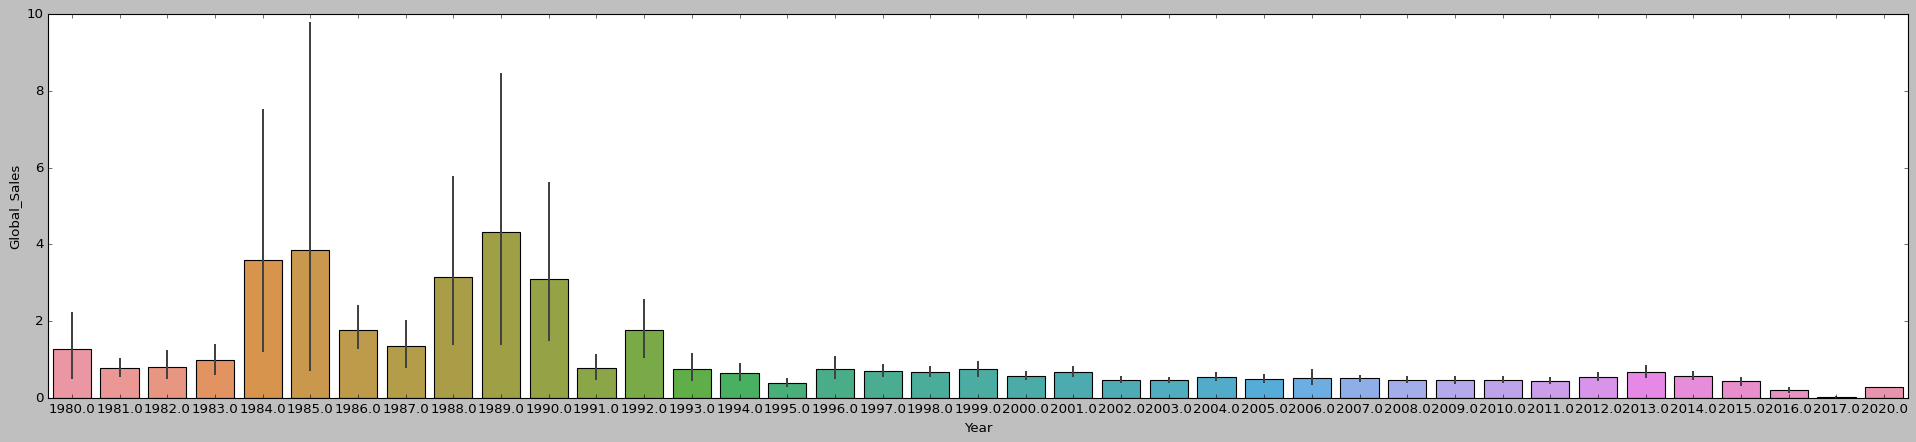

In [49]:

sns.barplot(x='Year', y='Global_Sales', data=df_ventasglobales)
plt.gcf().set_size_inches(30, 6)

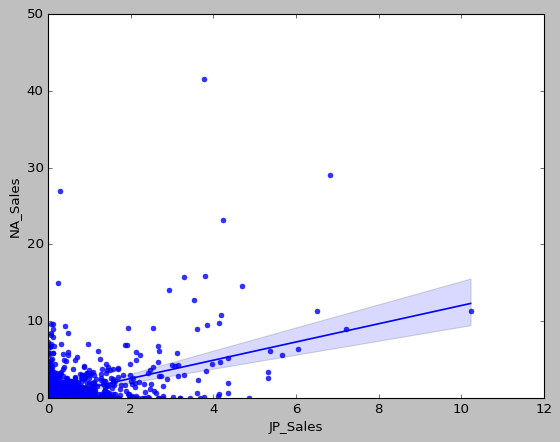

In [50]:
sns.regplot(x="JP_Sales", y="NA_Sales", data=df_ventasglobales)
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

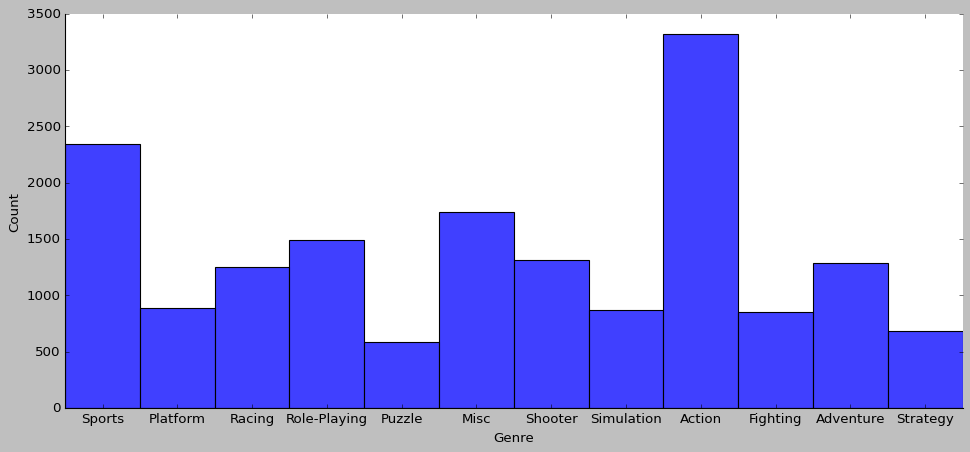

In [51]:
sns.displot(df_ventasglobales['Genre'],bins=None)
plt.gcf().set_size_inches(15, 6)

# Tercera Entrega

In [ ]:
#Introducción: 
#En esta entrega se utilizará el data set de ventas globales de los videojuegos a lo largo del tiempo, se espera observar que variables son las que representan 
#un mayor número de ventas por medio de las siguientes variables: genero, desarrollador y plataforma. de esta manera se podrá observar que variables son más importantes por el público
#para poder hacer una predicción de ventas. se espera que el público sea más influenciado por medio del genero y la plataforma de venta antes que cualquier otra variable
# primeramente veremmos las varialbeles de cual es el mercado con mayores ventas y los resultados en los siguientes gráficos arrojan que las ventas nacionales (EUA) 
#es el mayor mercado, a partir de ahí se verá que variable influye más en las variables. por medio de una regresión lineal se obtendrán las variables que tienen una 
#mayor influencia. 
#dados los resultados, la R2 de genero y plataforma, tienen mayor influencia en las ventas la plataforma más que el genero de los juegos. esto se puede observar ya que tiene 
#una r2 más grande la plataforma que si lo vemos por genero
#haciendo una tercera consulta, se puede observar que la variable Publisher, tiene mayor r2 que las otras 2. esto nos indica, que la compañia influye más en 
#en las ventas que las otras variables
#se intentó revisar las variables segemntandolas por genero y delimitandolas por acción, pero no me arroja un resultado optimo. para poder comenzar a trabajar con las varibales
# y tener un modelo predictivo, es importante comenzar con estas varibales e irlas segmentando de manera que me deje ver que tipo de videojuego poner a la venta y que ventas representaria

In [52]:
from sklearn.linear_model import LinearRegression
fig = px.scatter_3d(df_ventasglobales,x='NA_Sales', y='JP_Sales',z='EU_Sales',opacity=0.5)
fig.show()


#en esta gráfica 3D se puede observar que las ventas de EUA tienen una mayor influencia sobre las ventas de los otros países, haciendo una excepción en japón
#ya que el mercado de japón es átipico al del resto del mundo 

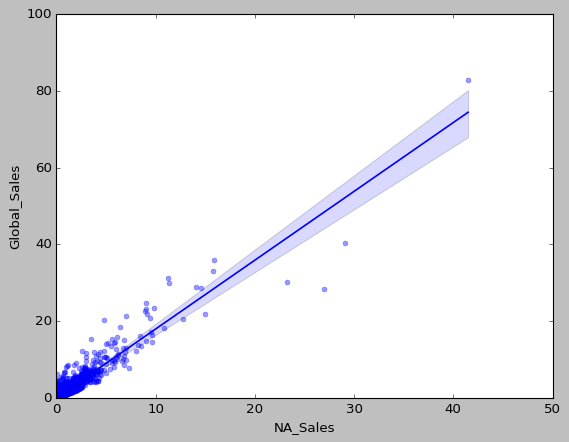

Intercepto:  0.06320233528186209
Coeficiente:  [1.79182728]


In [53]:
from sklearn.linear_model import LinearRegression
# Ajusta el modelo de regresión lineal a tus datos
model = LinearRegression().fit(df_ventasglobales[['NA_Sales']], df_ventasglobales['Global_Sales'])

# Visualiza la regresión lineal
sns.regplot(x="NA_Sales", y="Global_Sales", data=df_ventasglobales, scatter_kws={'alpha': 0.4})
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()
print("Intercepto: ", model.intercept_)
print("Coeficiente: ", model.coef_)
#Lo que se puede observar es lo que se introdujo antes, las ventas de EUA están fuertemente correlacionadas con las ventas del resto del mundo


In [54]:
! pip install statsmodels
from   scipy import stats
import statsmodels.formula.api as sm



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [55]:
df = pd.concat([df_ventasglobales[['Global_Sales']], df_ventasglobales['Genre']], axis=1)
model1 = 'Global_Sales ~ Genre'
lm1 = sm.ols(formula=model1,data=df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     18.22
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.06e-36
Time:                        03:47:49   Log-Likelihood:                -30779.
No. Observations:               16598   AIC:                         6.158e+04
Df Residuals:                   16586   BIC:                         6.168e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.52

In [56]:

df = pd.concat([df_ventasglobales[['Global_Sales']], df_ventasglobales['Genre']==('Adventure')], axis=1)
model1 = 'Global_Sales ~ Genre'
lm1 = sm.ols(formula=model1,data=df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     71.55
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.92e-17
Time:                        03:47:54   Log-Likelihood:                -30843.
No. Observations:               16598   AIC:                         6.169e+04
Df Residuals:                   16596   BIC:                         6.171e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5670      0.013     45.212

In [57]:
df = pd.concat([df_ventasglobales[['Global_Sales']], df_ventasglobales[['Platform']]], axis=1)
model1 = 'Global_Sales ~ Platform'
lm1 = sm.ols(formula=model1,data=df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     20.70
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.30e-109
Time:                        03:47:57   Log-Likelihood:                -30574.
No. Observations:               16598   AIC:                         6.121e+04
Df Residuals:                   16567   BIC:                         6.145e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7299      0.132  

In [58]:
df = pd.concat([df_ventasglobales[['Global_Sales']], df_ventasglobales[['Publisher']]], axis=1)
model1 = 'Global_Sales ~ Publisher'
lm1 = sm.ols(formula=model1,data=df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     3.402
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.85e-138
Time:                        03:48:02   Log-Likelihood:                -29837.
No. Observations:               16540   AIC:                         6.083e+04
Df Residuals:                   15962   BIC:                         6.529e+04
Df Model:                         577                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [59]:
df = pd.concat([df_ventasglobales[['Global_Sales','Genre','Platform']]],axis=1)
model1 = 'Global_Sales ~ Genre + Platform'
lm1 = sm.ols(formula=model1,data=df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     18.84
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.76e-132
Time:                        03:48:06   Log-Likelihood:                -30501.
No. Observations:               16598   AIC:                         6.109e+04
Df Residuals:                   16556   BIC:                         6.141e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.67

# Curta Entrega

**Abstracto**

*Lo que se busca obtener de este trabajo es lograr tener un modelo predictivo de las ventas de los vidojuegos en años futuros, tomaremos como nuestra variable dependiente "Ventas Globales" que es la suma de las ventas de las distintas zonas geográficas que comprenden nuestra Dataset que son Japón, Estados Unidos, Union Europea, Resto del Mundo. 
Las variables independientes que tomaremos en cuenta son: Plataforma y Genero, estas varibales históricamente han tenido una influencia sobre las distintas ventas de los vidojuegos, lo que al metaerlas en un modelo de regresión lineal nos mostrará por medio de su coeficiente cuanto influye marginalmente en las ventas y por medio del estadístico t de student y la probabilidad del mismo, nos dará su % de confienza, entre más cercano a 0 nos indica que estadísticamente es correcto utilizarlo, lo académicamente aprobalble es al 90% de confianza y más eficiente tener el 96% de confianza. 
En este trabajo se contempla hacer una vista de las variables y a partir de ahí se empiezan a discrimiar variables y sub-variables que no cumplan un estádistico t mayor al 90% de confianza y un coeficiente postivo, ya que aunque el estadístico sea correcto, solo nos interesan las variables que sean positivas, ya que buscamos aumentar las ventas y no reducirlas como lo hacen las variables con coeficiente negativo.

**Preguntas**

-¿Cuáles son mis variables? 
R: Dependiente: Ventas Globales
Independientes: Plataforma, Genero y Estudio Publicitario
-¿Las variables independientes son explicativas?
R: Si, pero se tienen que limpiar esas mismas variables porque no todas las subvariables son explicativas, como por ejemplo: en Genero, no todos los generos nos pueden servir para hacer el modelo, por ejemplo Aventura cumple con el estadístico pero su coeficiente nos muestra que cada juego que sale influye negativamente en las ventas (es importante recalcar que no es una regla, pero estadísticamente puede influir negativamente, para resolver esta duda, se tendría que hacer una regresión unicamente de las ventas de juegosd de aventura)
-Hipótesis 1: Las ventas de los juegos serán mayores en los generos de Plataforma, Rol-Playing, Shooter y Sports. si hiciera un un forecast ajustando estas variables, mis ventas serán mayores estadisticamente hablando
-Hipótesis 2: Las ventas tendrán mayor venta si solamente sujeto mis variables de plataforma a solamente Xbox y Play Station

**Objetivo**

*Mi objetivo es lograr un modelo que al controlar las distintas varibles me prediga las ventas que tendrá en los años futuros y así lograr que se pueda trabajar en la industria en una preorganización de donde invertir los recursos y ver que juego tiene mayor éxito antes de cualquier inversión

**Contexto Comercial**

*El contexto comercial es que cada variable me de un valor que pueda controlar de tal forma de que las inversiones fururas en la industria sean más rentables, de esta manera se logra reducir las pérdidas económicas por bajas ventas y lograr que se invierta menos en publicidad, ya que el público está predispuesto a comprar juegos con la data histórica

In [60]:
df = pd.concat([df_ventasglobales[['Global_Sales','Genre','Platform']]],axis=1)
model1 = 'Global_Sales ~ Genre + Platform'
lm1 = sm.ols(formula=model1,data=df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     18.84
Date:                Sun, 05 Mar 2023   Prob (F-statistic):          2.76e-132
Time:                        03:48:12   Log-Likelihood:                -30501.
No. Observations:               16598   AIC:                         6.109e+04
Df Residuals:                   16556   BIC:                         6.141e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.67

In [61]:
df['Shooter_or_Sports_or_RolePlaying'] = np.where(df['Genre'].isin(['Shooter', 'Sports','Role-Playing']), 1, 0)
model1 = 'Global_Sales ~ Shooter_or_Sports_or_RolePlaying'
lm1 = smf.ols(formula=model1, data=df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     32.92
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           9.77e-09
Time:                        03:48:15   Log-Likelihood:                -30863.
No. Observations:               16598   AIC:                         6.173e+04
Df Residuals:                   16596   BIC:                         6.174e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**Resultados**

Se obtuvo que al solamente sujetar las 3 variables de Shooter, Sports y Role-Playing, se obtuvo una varible que solamente tomara las variables que nos interesan y las demás las deshecha, lo que me da un resultado que si hiciera un juego que mezclara disparos, deportes y roleplaying como por ejemplo Supe Mario Soccer o Fornite que involucra temáticas de Rol y deportes, hacen que mi coeficiente suba y me de un 99% de confianza y un coeficiente de 1, el R2 no me indica que el modelo es poco explicativo, pero el Jarque-Bera me da cero y esas probabilidades son buenas. 

In [62]:
df_ventasglobales=df_ventasglobales[['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]



In [63]:
df_ventasglobales = df_ventasglobales[df_ventasglobales['Global_Sales'].notna()]
df_ventasglobales['Global_Sales'] = pd.to_numeric(df_ventasglobales['Global_Sales'], errors='coerce')
df_ventasglobales = df_ventasglobales[~df_ventasglobales['Global_Sales'].isnull()]

le = LabelEncoder()
y = le.fit_transform(df_ventasglobales['Global_Sales'])

X = df_ventasglobales.drop(['Global_Sales'], axis=1)

selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)

X_new = selector.transform(X)

print('Las variables seleccionadas son:')
for i, feature in enumerate(X.columns[selector.get_support()]):
    print(f'{i+1}. {feature} (puntuación: {selector.scores_[i]:.2f})')

Las variables seleccionadas son:
1. Rank (puntuación: 12957.45)
2. NA_Sales (puntuación: 19187.79)
3. EU_Sales (puntuación: 18497.76)
4. JP_Sales (puntuación: 5726.32)
5. Other_Sales (puntuación: 10215.98)


In [64]:

X = df_ventasglobales.drop('Global_Sales', axis=1)
y = df_ventasglobales['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2.7270465951800687e-05
